In [8]:
pip install pyproj==1.9.6

Installation de geos

In [9]:
!apt install proj-bin libproj-dev libgeos-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libproj-dev is already the newest version (4.9.3-2).
proj-bin is already the newest version (4.9.3-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.


Installation de matplotlib.basemap

In [10]:
!pip install https://github.com/matplotlib/basemap/archive/master.zip
 

     - 133.1MB 176.7MB/s
  Stored in directory: /tmp/pip-ephem-wheel-cache-ty8vswlj/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
Successfully built basemap


Permet d'import le csv des tweets directement

In [11]:
from google.colab import files
uploaded = files.upload()

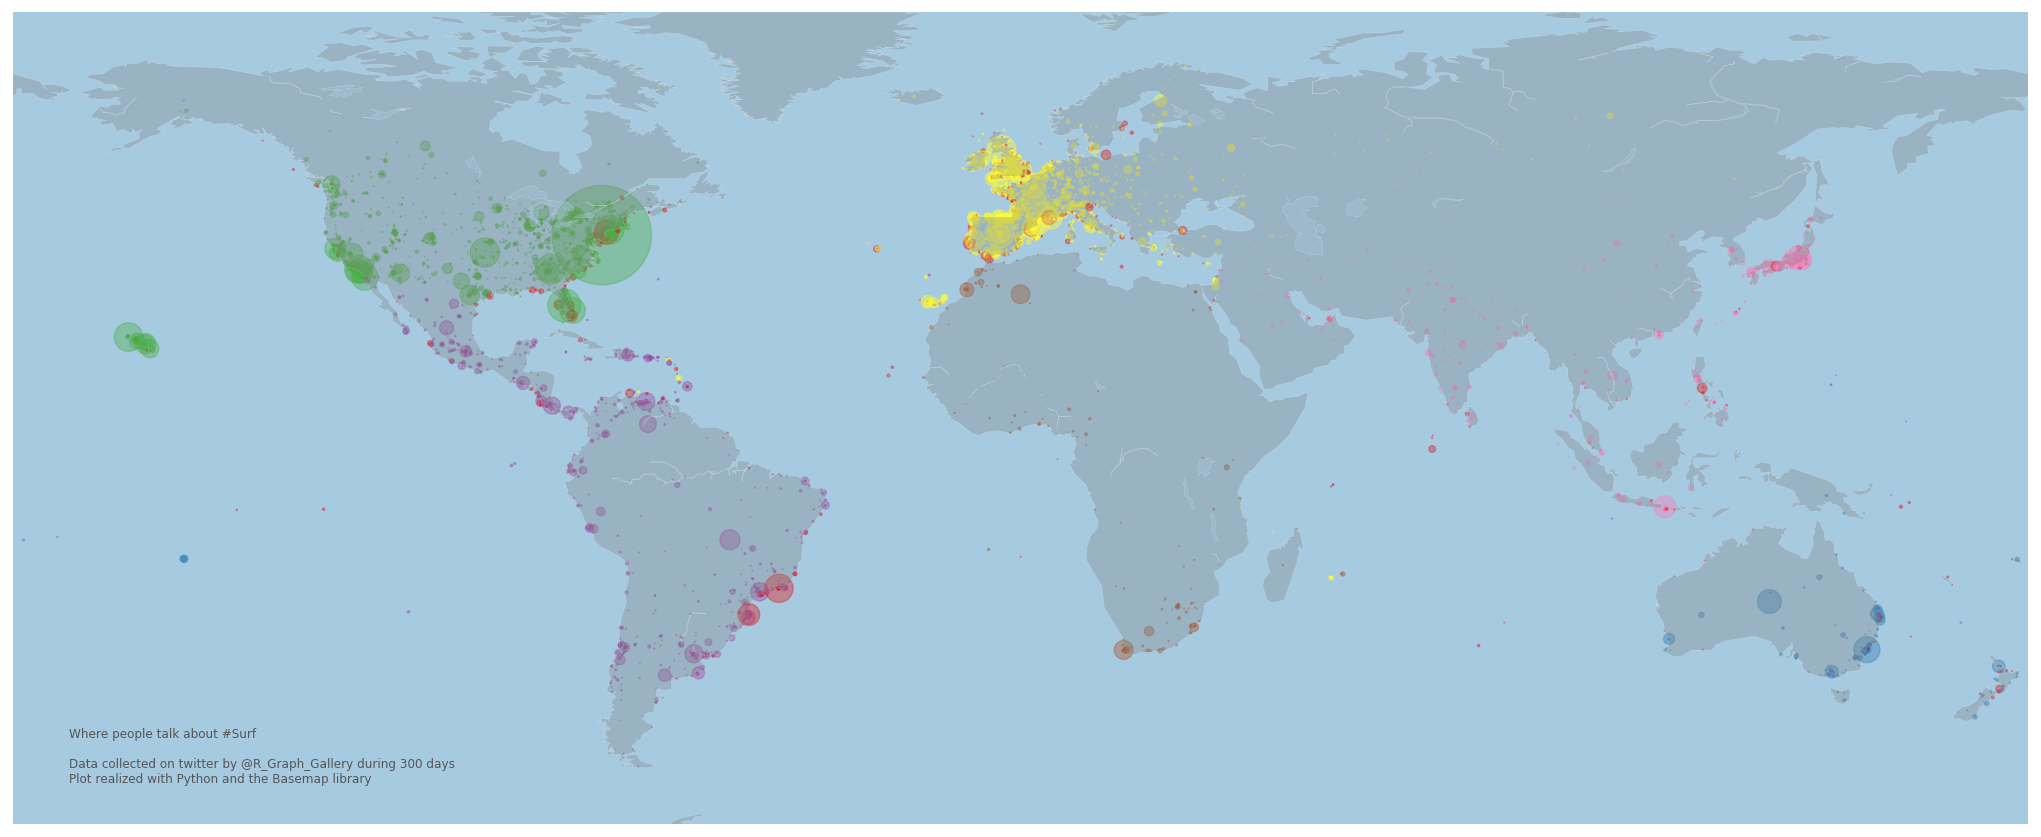

In [12]:
# Libraries
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# Set the dimension of the figure
my_dpi=96
plt.figure(figsize=(2600/my_dpi, 1800/my_dpi), dpi=my_dpi)

#TODO : Fonction pour lire le csv de paul + geopy pour traduire le nom de la ville VERS une latitude + longitude



# read the data (on the web)
data = pd.read_csv('http://python-graph-gallery.com/wp-content/uploads/TweetSurfData.csv', sep=";")

# Make the background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")

# prepare a color for each point depending on the continent.
data['labels_enc'] = pd.factorize(data['homecontinent'])[0]

# Add a point per position
m.scatter(data['homelon'], data['homelat'], s=data['n']/6, alpha=0.4, c=data['labels_enc'], cmap="Set1")

# copyright and source data info
plt.text( -170, -58,'Where people talk about #Surf\n\nData collected on twitter by @R_Graph_Gallery during 300 days\nPlot realized with Python and the Basemap library', ha='left', va='bottom', size=9, color='#555555' )

# Save as png
plt.savefig('#315_Tweet_Surf_Bubble_map1.png', bbox_inches='tight')


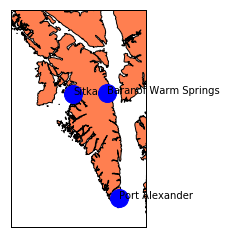

In [13]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
map = Basemap(projection='merc', lat_0 = 57, lon_0 = -135,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-136.25, llcrnrlat=56.0,
    urcrnrlon=-134.25, urcrnrlat=57.75)
 
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'coral')
map.drawmapboundary()
 
lons = [-135.3318, -134.8331, -134.6572]
lats = [57.0799, 57.0894, 56.2399]
x,y = map(lons, lats)
map.plot(x, y, 'bo', markersize=18)
 
#labels = ['Sitka', 'Baranof Warm Springs', 'Port Alexander']
#for label, xpt, ypt in zip(labels, x, y):
#    plt.text(xpt, ypt, label)
 
plt.show()

In [14]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.io.shapereader as shpreader
import itertools
import numpy as np

shapename = 'admin_0_countries'
countries_shp = shpreader.natural_earth(resolution='110m',
                                        category='cultural', name=shapename)

# some nice "earthy" colors
earth_colors = np.array([(199, 233, 192),
                                (161, 217, 155),
                                (116, 196, 118),
                                (65, 171, 93),
                                (35, 139, 69),
                                ]) / 255.
earth_colors = itertools.cycle(earth_colors)



ax = plt.axes(projection=ccrs.PlateCarree())
for country in shpreader.Reader(countries_shp).records():
    print country.attributes['name_long'], earth_colors.next()
    ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                      facecolor=earth_colors.next(),
                      label=country.attributes['name_long'])

plt.show()


SyntaxError: ignored

In [0]:
!pip install pyshp

In [0]:
!pip install shapelib

In [0]:
#! /usr/bin/env python

import sys
import os
from pylab import *
from mpl_toolkits.basemap import Basemap
import matplotlib as mp

import ShapeFile
import dbflib
from matplotlib.collections import LineCollection
from matplotlib import cm

def get_shapeData(shp,dbf):
  for npoly in range(shp.info()[0]):
    shpsegs = []
    shpinfo = []

    shp_object = shp.read_object(npoly)
    verts = shp_object.vertices()
    rings = len(verts)
    for ring in range(rings):
        if ring == 0:
            shapedict = dbf.read_record(npoly)
        name = shapedict["name_long"]
        continent = shapedict["continent"]
        lons, lats = zip(*verts[ring])
        if max(lons) > 721. or min(lons) < -721. or max(lats) > 91. or min(lats) < -91:
            raise ValueError
        x, y = m(lons, lats)
        shpsegs.append(zip(x,y))
        shapedict['RINGNUM'] = ring+1
        shapedict['SHAPENUM'] = npoly+1
        shpinfo.append(shapedict)

    lines = LineCollection(shpsegs,antialiaseds=(1,))
    lines.set_facecolors(cm.jet(np.random.rand(1)))
    lines.set_edgecolors('k')
    lines.set_linewidth(0.3)
    ax.add_collection(lines)


if __name__=='__main__':

  f=figure(figsize=(10,10))
  ax = plt.subplot(111)
  m = Basemap(projection='merc',llcrnrlat=30,urcrnrlat=72,\
            llcrnrlon=-40,urcrnrlon=50,resolution='c')
  m.drawcountries(linewidth=0.1,color='w')

  sfile = 'ne_10m_admin_0_countries'

  shp = ShapeFile(sfile)
  dbf = dbflib.open(sfile)
  get_shapeData(shp,dbf)

  show()
  sys.exit(0)